<center>
<h1>Biến đổi Fourier một chiều</h1>
<h2>Đỗ Mạnh Hùng - 20002053</h2>
</center>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Bài tập 1

In [14]:
def dft(x: np.ndarray):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X
    

In [15]:
def idft(x: np.ndarray):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    X = np.dot(e, x) / N
    return X

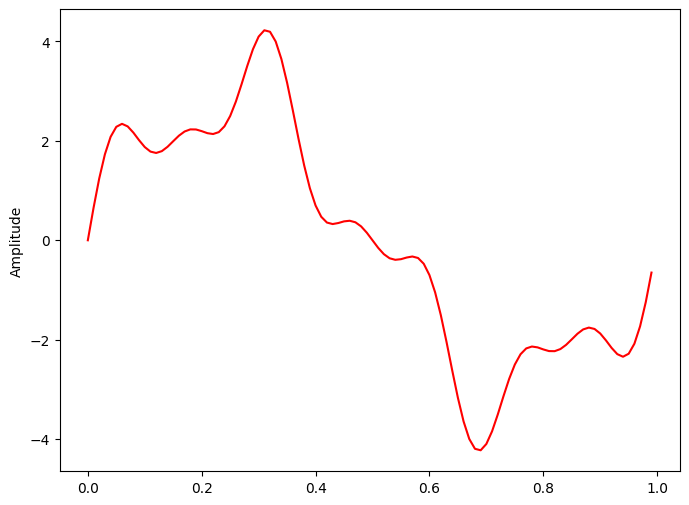

In [11]:
def data_generator():
    # lấy mãu với tần số 100Hz
    sr = 100
    
    # sinh trong khoảng thời gian (0, 1)
    time_step = 1.0/sr # time step
    t = np.arange(0, 1, time_step)

    freq = 1.
    x = 3 * np.sin(2 * np.pi * freq * t)

    freq = 4
    x += np.sin(2 * np.pi * freq * t)

    freq = 7   
    x += 0.5 * np.sin(2 * np.pi * freq * t)
    
    plt.figure(figsize = (8, 6))
    plt.plot(t, x, 'r')
    plt.ylabel('Amplitude')

    plt.show()
    
    return x
    
x = data_generator()
    

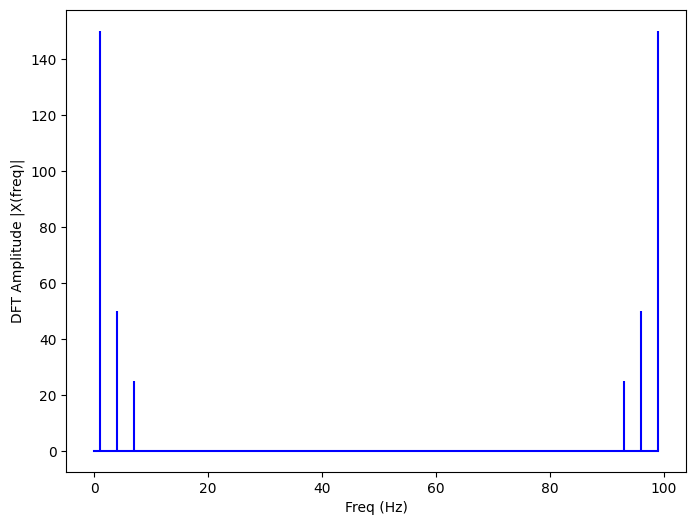

In [30]:
X = dft(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/100
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

# Bài tập 2

### a. Đọc tập dữ liệu đã cho và áp dụng biến đổi fourier với dữ liệu trên. Vẽ biểu đồ đường với dữ liệu ban đầu và biến đổi Fourier tương ứng.

In [83]:
data = np.loadtxt('./ex2-data.txt')

In [84]:
data_fourier_transform = dft(data)

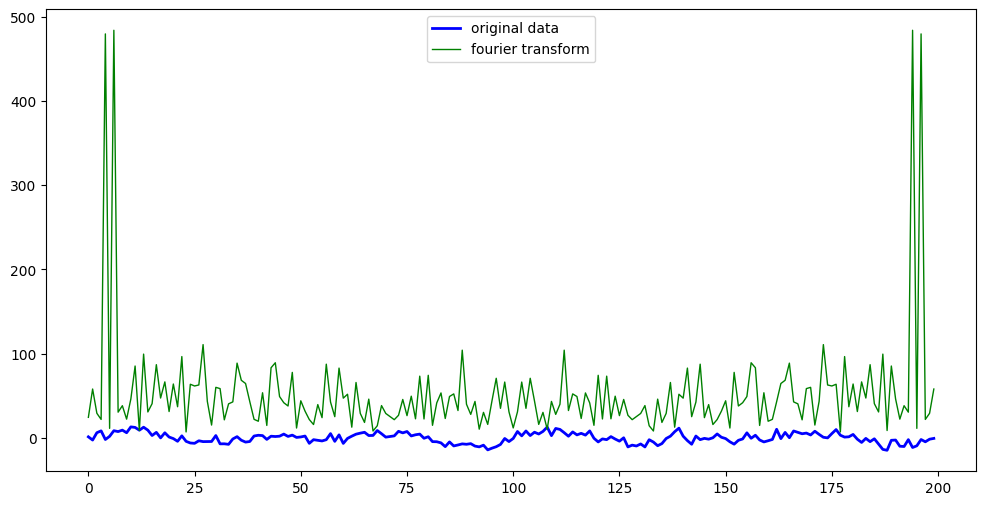

In [119]:
plt.figure(figsize=(12, 6))
# plt.subplot(121)
plt.plot(data, label='original data', color='b', linewidth=2)
# plt.subplot(122)
plt.plot(np.abs(data_fourier_transform), label='fourier transform', color='g', linewidth=1)
plt.legend()
plt.show()

### b. Chọn một ngưỡng threshold phù hợp. Sau đó, tiến hành loại bỏ các tần số có biên độ nhỏ hơn threshold và thực hiện biến đổi Fourier ngược. Vẽ biểu đồ đường của dữ liệu sau khi lọc và biến đổi Fourier tương ứng

In [133]:
threshold = 120
filtered_data_ft = np.where(np.abs(data_fourier_transform) > threshold, data_fourier_transform, 0)

In [134]:
data_fourier_transform_idf = idft(filtered_data_ft)

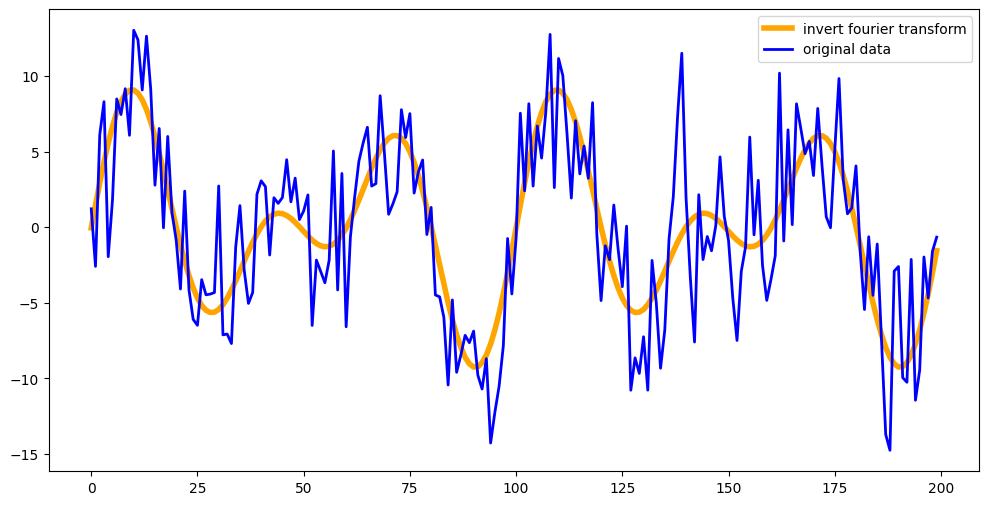

In [136]:
plt.figure(figsize=(12, 6))
plt.plot(data_fourier_transform_idf, label='invert fourier transform', color='orange', linewidth=4)
plt.plot(data, label='original data', color='b', linewidth=2)
plt.legend()
plt.show()

### c. Anh/chị có nhận xét gì về dữ liệu sau khi lọc?

dữ liệu sau khi lọc có sự biến động ít hơn, mức độ khử nhiễu tương đối tốt